In [1]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
images = genfromtxt('images.csv', delimiter=',')
labels = genfromtxt('labels.csv', delimiter=',')
images = images.reshape(images.shape[0], 28,28)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                        labels,
                                                        test_size=0.33,
                                                        stratify=labels)

In [4]:
#Use ImageDataGenerator to increase data size
image_gen = ImageDataGenerator(rotation_range=10, # rotate the image 10 degrees
                                   width_shift_range=0.10, # Shift the pic width by a max of 5%
                                   height_shift_range=0.10, # Shift the pic height by a max of 5%
                                   zoom_range=0.5, # Zoom in by 5% max
                                   fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                                   )

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
image_gen.fit(X_train)

In [6]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [7]:
epochs = 300
patience = 10
val_losses = []
min_val_loss = model.evaluate(X_test, y_test)
loss_ind = 0

for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in image_gen.flow(X_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / 32:
            break
    
    #EarlyStopping
    curr_loss = model.evaluate(X_test, y_test)
    val_losses.append(curr_loss)
    if  curr_loss < min_val_loss:
        min_val_loss = curr_loss
        loss_ind = 0
        model.save_weights('best_weights.h5')
    else:
        loss_ind += 1
        if loss_ind == patience:
            break

66/66 [==============================] - 2s 24ms/sample - loss: 2.3023
Epoch 0
Train on 32 samples
32/32 [==============================] - 1s 27ms/sample - loss: 2.2969
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 2.3516
Train on 32 samples
32/32 [==============================] - 0s 435us/sample - loss: 2.3057
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 2.2820
Train on 6 samples
66/66 [==============================] - 0s 226us/sample - loss: 2.2969
Epoch 1
Train on 32 samples
32/32 [==============================] - 0s 311us/sample - loss: 2.2698
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 2.2989
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 2.3017
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 2.3151
Train on 6 samples
66/66 [==============================] - 0s 241us/sample - loss: 2.2

Train on 32 samples
32/32 [==============================] - 0s 313us/sample - loss: 2.2383
Train on 32 samples
32/32 [==============================] - 0s 406us/sample - loss: 2.0787
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 2.2661
Train on 6 samples
66/66 [==============================] - 0s 241us/sample - loss: 1.9778
Epoch 16
Train on 32 samples
32/32 [==============================] - 0s 312us/sample - loss: 2.1868
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 2.0439
Train on 32 samples
32/32 [==============================] - 0s 344us/sample - loss: 2.1866
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 2.3127
Train on 6 samples
66/66 [==============================] - 0s 227us/sample - loss: 1.8973
Epoch 17
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 2.1762
Train on 32 samples
32/32 [==============================] - 0s 

Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.7210
Train on 6 samples
66/66 [==============================] - 0s 212us/sample - loss: 0.9631
Epoch 31
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 1.9487
Train on 32 samples
32/32 [==============================] - 0s 436us/sample - loss: 2.2547
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.8622
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.6787
Train on 6 samples
66/66 [==============================] - 0s 242us/sample - loss: 1.2236
Epoch 32
Train on 32 samples
32/32 [==============================] - 0s 437us/sample - loss: 1.7256
Train on 32 samples
32/32 [==============================] - 0s 404us/sample - loss: 1.5790
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 1.9430
Train on 32 samples
32/32 [==============================] - 0s 

66/66 [==============================] - 0s 212us/sample - loss: 0.6442
Epoch 46
Train on 32 samples
32/32 [==============================] - 0s 375us/sample - loss: 1.4288
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 1.0326
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 1.7714
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.1755
Train on 6 samples
66/66 [==============================] - 0s 226us/sample - loss: 0.5237
Epoch 47
Train on 32 samples
32/32 [==============================] - 0s 469us/sample - loss: 1.3742
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.3895
Train on 32 samples
32/32 [==============================] - 0s 502us/sample - loss: 1.3003
Train on 32 samples
32/32 [==============================] - 0s 312us/sample - loss: 1.3677
Train on 6 samples
66/66 [==============================] - 0s 242us/sample - loss:

Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 1.2508
Train on 32 samples
32/32 [==============================] - 0s 498us/sample - loss: 1.2014
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 1.0233
Train on 6 samples
66/66 [==============================] - 0s 257us/sample - loss: 0.3575
Epoch 62
Train on 32 samples
32/32 [==============================] - 0s 465us/sample - loss: 1.1218
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 1.3686
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.2756
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 1.0335
Train on 6 samples
66/66 [==============================] - 0s 226us/sample - loss: 0.5987
Epoch 63
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 1.3352
Train on 32 samples
32/32 [==============================] - 0s 

Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 0.8659
Train on 6 samples
66/66 [==============================] - 0s 212us/sample - loss: 0.2116
Epoch 77
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 0.7903
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 0.9119
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 0.8369
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.0726
Train on 6 samples
66/66 [==============================] - 0s 257us/sample - loss: 0.2084
Epoch 78
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 1.1149
Train on 32 samples
32/32 [==============================] - 0s 406us/sample - loss: 0.9724
Train on 32 samples
32/32 [==============================] - 0s 404us/sample - loss: 0.8058
Train on 32 samples
32/32 [==============================] - 0s 

66/66 [==============================] - 0s 256us/sample - loss: 0.1072
Epoch 92
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 0.8553
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 1.2784
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 0.7466
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 1.0328
Train on 6 samples
66/66 [==============================] - 0s 227us/sample - loss: 0.1599
Epoch 93
Train on 32 samples
32/32 [==============================] - 0s 435us/sample - loss: 0.7867
Train on 32 samples
32/32 [==============================] - 0s 406us/sample - loss: 0.6840
Train on 32 samples
32/32 [==============================] - 0s 344us/sample - loss: 0.7359
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 1.0478
Train on 6 samples
66/66 [==============================] - 0s 227us/sample - loss:

Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 0.6753
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 0.6492
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 0.5826
Train on 6 samples
66/66 [==============================] - 0s 241us/sample - loss: 0.1806
Epoch 108
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 0.8334
Train on 32 samples
32/32 [==============================] - 0s 375us/sample - loss: 0.8059
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 0.8831
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 0.6516
Train on 6 samples
66/66 [==============================] - 0s 287us/sample - loss: 0.0682
Epoch 109
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 0.5452
Train on 32 samples
32/32 [==============================] - 0

Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 0.4828
Train on 6 samples
66/66 [==============================] - 0s 393us/sample - loss: 0.1008
Epoch 123
Train on 32 samples
32/32 [==============================] - 0s 498us/sample - loss: 0.4143
Train on 32 samples
32/32 [==============================] - 0s 500us/sample - loss: 0.5184
Train on 32 samples
32/32 [==============================] - 0s 468us/sample - loss: 0.7475
Train on 32 samples
32/32 [==============================] - 0s 344us/sample - loss: 0.7658
Train on 6 samples
66/66 [==============================] - 0s 227us/sample - loss: 0.0808
Epoch 124
Train on 32 samples
32/32 [==============================] - 0s 404us/sample - loss: 1.0877
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 0.4137
Train on 32 samples
32/32 [==============================] - 0s 312us/sample - loss: 0.5090
Train on 32 samples
32/32 [==============================] - 0

66/66 [==============================] - 0s 227us/sample - loss: 0.0434
Epoch 138
Train on 32 samples
32/32 [==============================] - 0s 437us/sample - loss: 0.3699
Train on 32 samples
32/32 [==============================] - 0s 499us/sample - loss: 0.5282
Train on 32 samples
32/32 [==============================] - 0s 405us/sample - loss: 0.4776
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 0.3430
Train on 6 samples
66/66 [==============================] - 0s 241us/sample - loss: 0.0305
Epoch 139
Train on 32 samples
32/32 [==============================] - 0s 373us/sample - loss: 0.3713
Train on 32 samples
32/32 [==============================] - 0s 374us/sample - loss: 0.7743
Train on 32 samples
32/32 [==============================] - 0s 343us/sample - loss: 0.6013
Train on 32 samples
32/32 [==============================] - 0s 342us/sample - loss: 0.9045
Train on 6 samples
66/66 [==============================] - 0s 226us/sample - los

In [8]:
import matplotlib.pyplot as plt

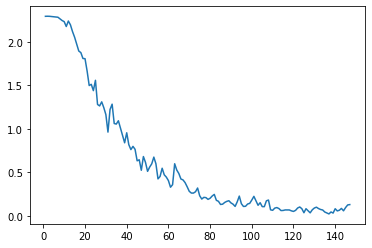

In [9]:
#val_loss over epochs
x = range(1, len(val_losses) + 1)
plt.plot(x, val_losses)

In [11]:
model.load_weights('best_weights.h5')

[5]


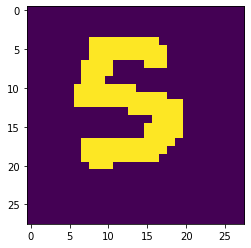

In [13]:
print(model.predict_classes(X_test[0].reshape(1,28,28,1)))
plt.imshow(X_test[0].reshape(28,28))

In [14]:
model.save("model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model\assets
